In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/sample_negative_emotion.csv')
df

,ad,neg_emo
0,See why everyone is celebrating at Hoblit Dodg...,0
1,Help give people without a home a chance to le...,0
2,I am so proud of what this grassroots team has...,0
3,We have until March 31st to raise money for ou...,0
4,Learn how to use the new staffing law to impro...,0
...,...,...
119,Blood donation saves lives!\nThis cannot be sa...,0
120,"Over 10,000 Palestinians have been forced left...",1
121,"Palestine Emergency Appeal: 53 Palestinians, i...",1
122,Let's build Cameroon. Wake up Cameroonians and...,0


In [4]:
# creating prediction model

# creating the filters 
filters =  [  'suffering', 'suffered','nightmare','forced','abuse','abused','burden','getting worse','horror','violence','catastrophe','affraid','cruelty','deadly','terror'
                 'danger', 'dangerous',  'regret', 'regretted', 'rejection', 
                 'reject','rejected', 'risk', 'risked', 'sabotage', 'sabotaged', 'sabotaging', 'scary', 'scared',
                 'suffer', 'threat','threatened', 'threatening', 'tragic', 'tragically', 'tragical', 'trapped' , 'trap',
                 'fail', 'fails', 'failed', 'failing', 'victim', 'fooled','fooling', 'helpless', 'hurting', 'hurt', 'scared',
                 'mistake' , 'mistaken', 'neglect','neglected', 'neglecting', 'pitfalls', 'powerless', 
                 'vulnerable', 'waste', 'wasted','wasting', 'worry', 'worried', 'worrying', 'disappointed', 'dissapoint', 'dissapointing',
                 'frustrated', 'frsutrating', 'greedy',  'greed', 'irritated',  'maddening', 'mad',
                 'ruthless',  'misleading', 'frustration','infuriating','infuriated', 'pointless', 'reclaim', 'reclaimed', 'sick', 'tired', 'tiring', 'swindled', 'swindle', 
                 'trigger', 'triggered', 'unacceptable', 'violate', 'violated', 'uncomfortable', 'victims', 'risking', 'critcial', 'critically', 'concerning', 'concerned', 
                 'problamatic', 
                  'drastic', 'drastiaclly', 'hardship', 'hardships', 
                 'rigging', 'rape', 'raped', 'assault', 'assaulted', 'assaulting', 'insult', 'insulting', 'murder', 
                 'weapon',  'rigged', 
                 'desperate', 'desperated',  'danger', 'regret',  'risk', 'sabotage', 'scary','threat',
                  'tragic', 'victim',  'helpless', 'hurting','vulnerable', 'frustrated', 'greedy',
                 'irritated',  'violate'
            ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.831
                     precision    recall  f1-score   support

no negative emotion       0.85      0.90      0.88        82
   negative emotion       0.78      0.69      0.73        42

           accuracy                           0.83       124
          macro avg       0.82      0.80      0.80       124
       weighted avg       0.83      0.83      0.83       124

confusion matrix:
[[74  8]
 [13 29]]



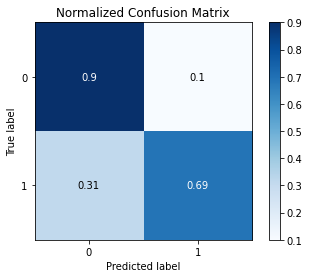

In [5]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['neg_emo'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['neg_emo'], y_pred, target_names=['no negative emotion', 'negative emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['neg_emo'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['neg_emo'], y_pred, normalize=True)
plt.show()